# Getting started
___
The following illustrates the basic functionalities of the proteusAI package, such as training machine learning models using experimental data, performing zero-shot predictions and visualizing results. 

## Training models with experimental data
___

### 1.  Loading data from csv files

In [9]:
import os
os.getcwd()

'/home/jonfunk/ProteusAI/demo'

In [10]:
import sys
sys.path.append('../src/')
import proteusAI as pai

# will initiate storage space - else in memory
library = pai.Library(user='guest', overwrite=False) 

# load data from csv or excel: x should be sequences, y should be labels, y_type class or num
library.read_data(data='demo_data/Nitric_Oxide_Dioxygenase_raw.csv', seqs='Sequence', y='Data', y_type='num', names='Description')

# compute and save ESM-2 representations at example_lib/representations/esm2
library.compute(method='esm2', batch_size=10)

User guest already exists. Loading existing data...
Initializing user 'guest'...
Done!
Loading library 'guest'...
- Found representations of type 'esm2' in 'rep/esm2'.
Loading done!
computing 446 proteins


OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacity of 15.77 GiB of which 18.19 MiB is free. Including non-PyTorch memory, this process has 15.74 GiB memory in use. Of the allocated memory 15.17 GiB is allocated by PyTorch, and 211.04 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### 2. Training models

In [4]:
# Choose model type, random forest, linear regression, svm, ...
model = pai.Model(model_type='knn')

# will save a model and report at models/rf/
model.train(library=library, x='esm2', split='random')

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Predicted vs. True y-values'}, xlabel='y', ylabel='predicted y'>)

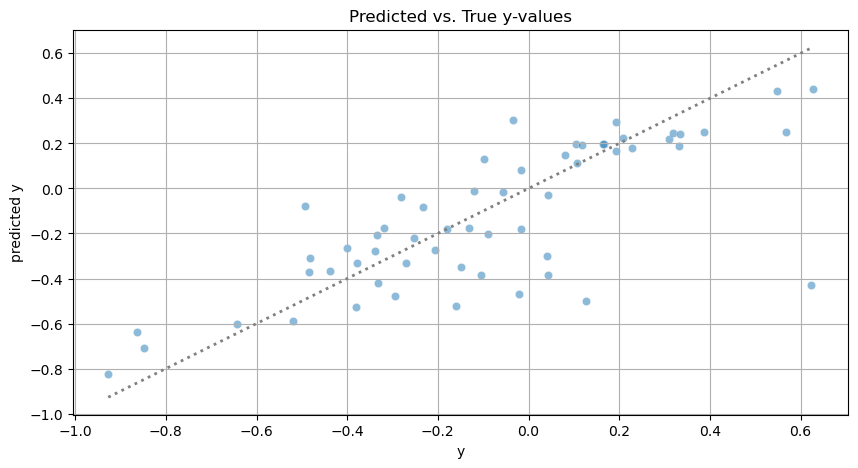

In [5]:
y_t = model.y_val
y_p = model.y_val_pred
model.true_vs_predicted(y_t, y_p, file='val_predicted_vs_true.png')

## Making zero-shot predictions
___
### 1. Creating a protein object

In [1]:
import sys
sys.path.append('../src/')
import proteusAI as pai

# loading a protein from a fasta file
protein = pai.Protein.load_fasta('demo_data/GB1_wt.fasta')
protein

proteusAI.Protein():
____________________
name	: wt|GB1
seq	: MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLCELPERQIHKIASALLAYARSIDNPSALQAAIRRMVLSHARAGVQAVHYPLYWECLRDAIKEVLGPDATETLLQAWKEAYDFLAHLLSTKEAQVYAVLAE
rep	: []
y	None

In [2]:
protein.path = 'example_project/'
protein.path

'example_project/'

## Structure based design
___
### 1. loading structure

In [1]:
import sys
sys.path.append('../src/')
import proteusAI as pai
import argparse
import numpy as np
from pathlib import Path
import torch
import torch.nn.functional as F
import esm
import esm.inverse_folding
import esm.inverse_folding.util
from esm.inverse_folding.util import CoordBatchConverter

# Example of using the function without specifying an output path
model, alphabet = esm.pretrained.esm_if1_gvp4_t16_142M_UR50()
print(type(alphabet))
pdbfile = "demo_data/GB1.pdb"
chain = "A"
fixed = [1,2,3,4,5,6]

<class 'esm.data.Alphabet'>


/Users/jonathanfunk/miniforge3/envs/proteusAI/lib/python3.11/site-packages/esm/pretrained.py:215: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  warnings.warn(


In [2]:
prot = pai.Protein(struc=pdbfile)
prot

proteusAI.Protein():
____________________
name	: GB1
seq	: None
rep	: []
y:	None
struc:	demo_data/GB1.pdb

In [4]:
t = prot.esm_if()

Native sequence loaded from structure file:
MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTDDATKTFTVTE
Saving sampled sequences to /var/folders/sd/pr3fylj57wlgrmcxg1v4zp3c0000gn/T/tmpq3sm8sr0.txt.
>sampled_seq_1 recovery: 0.4
SQYTIKWNGQSYTGTSSFDAANRDEASKIFNDRAAANGLQGVWTDYDTRTFTVTD 

>sampled_seq_2 recovery: 0.3090909090909091
GKFTLIWECEKVSGTSSVIAANYELATVIFEAAASDKMVKGEWVDFQNQTFTVID 

>sampled_seq_3 recovery: 0.34545454545454546
QRYTMKWEGATKTGVEEVNAANMEEATTKFQSKAADKGMTGSWSDKETRTFTVQE 

>sampled_seq_4 recovery: 0.45454545454545453
MRYVLRWKGKLAKGQETVNAANANEAKKVFRRRAGARGLTGQWTNLKQKTFVVTE 

>sampled_seq_5 recovery: 0.45454545454545453
MNYELIWNGWIIKGVMTVEAANKTKATAMFQKAAKDKGYSGTWTNKQTKTFTITK 

>sampled_seq_6 recovery: 0.38181818181818183
MKYTLKWQGNVVEGSETVNAADAYEAEMIFEKIASDKGLEGVWEDFVSGTYEVRE 

>sampled_seq_7 recovery: 0.4
VEYVLKWNGAKLTGTKTVEAEDRKEATKIFNKRAAALGLTGEWEDYQQHTYTIRE 

>sampled_seq_8 recovery: 0.3090909090909091
MTYTLNWKGEKNTGRATVVAENRFIAQAVFEQMASEAGLYGLWANFSFRTFEIRA 

>sampled_seq_9 r

In [5]:
pai.ml_tools.esm_tools.

In [3]:
coords, native_seq = esm.inverse_folding.util.load_coords(pdbfile, chain)

In [10]:
pai.struc.chain_parser(pdbfile)

['A']

In [5]:
pai.ml_tools.esm_tools.esm_design(pdbfile, chain, fixed=fixed, temperature=1.0, num_samples=10, outpath=None, model=model, alphabet=alphabet)

Native sequence loaded from structure file:
MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTDDATKTFTVTE
Saving sampled sequences to /var/folders/sd/pr3fylj57wlgrmcxg1v4zp3c0000gn/T/tmp7euuvdyk.txt.
>sampled_seq_1 recovery: 0.4727272727272727
MQYKLILDGVINLGEMAVTADDADEAEKIFQNLAKANGLSGRWNDEDAKTYNVRG 

>sampled_seq_2 recovery: 0.6181818181818182
MQYKLILNGEQVKGILTVEAPNSATAEKKFKKYAQQNGLTGEWEDNFTKTYTVHG 

>sampled_seq_3 recovery: 0.5272727272727272
MQYKLILAGDKNKGEMAVTAENAQSAEQAFKAMADMNSIKGEWDDEVTKTYTVTG 

>sampled_seq_4 recovery: 0.43636363636363634
MQYKLILDGEKVQGSAEYNAANADAAEQIFSDFARQHGIAGVWKDFMTKLFTVSG 

>sampled_seq_5 recovery: 0.43636363636363634
MQYKLILAGPEIKGKAHAEAEDASEAEVAFKSFAKKRGLTGYWEDYVSRIYIVKG 

>sampled_seq_6 recovery: 0.41818181818181815
MQYKLIEAGEATRGVAKFEAVNSDEAELVFQSLARKHGMCGTWEDKESRTFYVRG 

>sampled_seq_7 recovery: 0.43636363636363634
MQYKLIQDGKLVIGSMSVTADDAEEAQKIFKKMAQMHGNAGAWEDSESKVYLVTG 

>sampled_seq_8 recovery: 0.43636363636363634
MQYKLILDGDKYQGERTVIAKNANEAKMKFLKFCKLNGITGKW

In [60]:
import shutil

def save_tempfile(temp_file, target_file_path):
    """
    Copies the contents of a temporary file to a permanent file location.
    
    Args:
    temp_file_path (str): The file path of the temporary file.
    target_file_path (str): The file path where the contents should be permanently saved.
    
    Returns:
    bool: True if the file was copied successfully, False if an error occurred.
    """
    if type(temp_file) == tempfile._TemporaryFileWrapper:
        temp_file_path = temp_file.file.name
    elif type(temp_file) == str:
        temp_file_path = temp_file
    else:
        raise ValueError('tempfile has an unexpected format')
    try:
        # Copy the content of the temporary file to the target file
        shutil.copy(temp_file_path, target_file_path)
        print(f"File has been successfully saved to {target_file_path}.")
        return True
    except Exception as e:
        print(f"Failed to save the file: {e}")
        return False

In [61]:
type(temp_file)

tempfile._TemporaryFileWrapper

In [62]:
save_tempfile(temp_file, 'test')

File has been successfully saved to test.


True

In [11]:
model.encoder?

Signature:      model.encoder(*args, **kwargs)
Type:           GVPTransformerEncoder
String form:   
GVPTransformerEncoder(
           (dropout_module): Dropout(p=0.1, inplace=False)
           (embed_tokens): Embedd <...> se_affine=True)
           )
           )
           (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
           )
File:           ~/miniforge3/envs/proteusAI/lib/python3.11/site-packages/esm/inverse_folding/gvp_transformer_encoder.py
Docstring:     
Transformer encoder consisting of *args.encoder.layers* layers. Each layer
is a :class:`TransformerEncoderLayer`.

Args:
    args (argparse.Namespace): parsed command-line arguments
    dictionary (~fairseq.data.Dictionary): encoding dictionary
    embed_tokens (torch.nn.Embedding): input embedding
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.